# 🧪 Data Cleaning Validation Notebook

**Notebook Purpose:**  
This notebook is intended to test and validate the functionality of the `cleaning.py` module during development.  
It will be used to clean the raw dataset which involves the following steps:
- ✅ Dropping columns with a single value.
- ✅ Converting columns to correct datatypes.
- ✅ Removing outliers.
- ✅ Imputing missing values

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from music_and_mental_health_survey_analysis.config import (
    PROCESSED_DATA_DIR, RAW_DATA_DIR, CLEANING_EVALUATIONS_DIR
)

2025-06-09 20:31:50.192 | INFO     | music_and_mental_health_survey_analysis.config:<module>:15 - PROJ_ROOT path is: /home/arsen/Documents/dsc_projects/music_health_survey/music_mental_health_analysis


In [3]:
# Set pandas options
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv(PROCESSED_DATA_DIR / 'cleaned.csv') #originally processed_dataset.csv
df.head()

,Age,Hours per day,BPM,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,3.0,156.0,Spotify,Yes,Yes,Yes,Latin,Yes,Yes,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,Improve
1,63.0,1.5,119.0,Pandora,Yes,No,No,Rock,Yes,No,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,Improve
2,18.0,4.0,132.0,Spotify,No,No,No,Video game music,No,Yes,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect
3,61.0,2.5,84.0,YouTube Music,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve
4,18.0,4.0,107.0,Spotify,Yes,No,No,R&B,Yes,No,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve


# ✅ Static columns

In [5]:
# Generate list of static columns

static_cols = []

for col in df.columns:
    if len(set(df[col].unique())) < 2:
        static_cols.append(col)

print(f"Columns with a single value: {', '.join(static_cols)}")

Columns with a single value: 


# ✅ Datatypes

Since datatypes are not saved with the data, it is not possible to validate here whether those conversions performed correctly. 

Instead, we will look for any anomalies in the cleaned data that may have occurred because of irregular conversions. Columns of particular importance will be **continuous columns** since they had missing values imputed with `KNNImputer`.

In [6]:
df.dtypes

Age                             float64
Hours per day                   float64
BPM                             float64
Primary streaming service        object
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object


In [7]:
# Verify continuous variable type columns

continuous_cols = ['Age', 'Hours per day', 'BPM']

df[continuous_cols].head()

,Age,Hours per day,BPM
0,18.0,3.0,156.0
1,63.0,1.5,119.0
2,18.0,4.0,132.0
3,61.0,2.5,84.0
4,18.0,4.0,107.0


In [8]:
# Verify ordinal mental condition columns

ordinal_cols = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

df[ordinal_cols].head()

,Anxiety,Depression,Insomnia,OCD
0,3,0,1,0
1,7,2,2,1
2,7,7,10,2
3,9,7,3,3
4,7,2,5,9


In [9]:
# Verify ordinal frequency columns

freq_cols = [col for col in df.columns if col.startswith('Frequency')]

df[freq_cols].head()

,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes
1,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely
2,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently
3,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never
4,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely


# ✅ Drop timestamp columns

In [10]:
# Make sure there are no timestamp columns left

datetime_cols = []

for col in df.columns:
    if pd.api.types.is_datetime64_any_dtype(df[col]):
        datetime_cols.append(col)

print(f"Datetime columns left: {', '.join(datetime_cols)}")

Datetime columns left: 


# ✅ Remove Outliers

##### Checklist:
- ✅ Verify `BPM` no longer has extreme outliers.
- ✅ Verify `Age` retained values which would be deemed outliers with the **iqr method**.
- ✅Verify `Hours per day` similarly retained values which would be deemed outliers via the **iqr method**.

In [11]:
raw_df = pd.read_csv(RAW_DATA_DIR / 'mxmh_survey_results.csv')
raw_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## BPM

In [12]:
# Remove extreme outlier from raw BPM in order to not severly skew chart

max_bpm = raw_df['BPM'].max()
raw_df = raw_df[raw_df['BPM'] < 600]

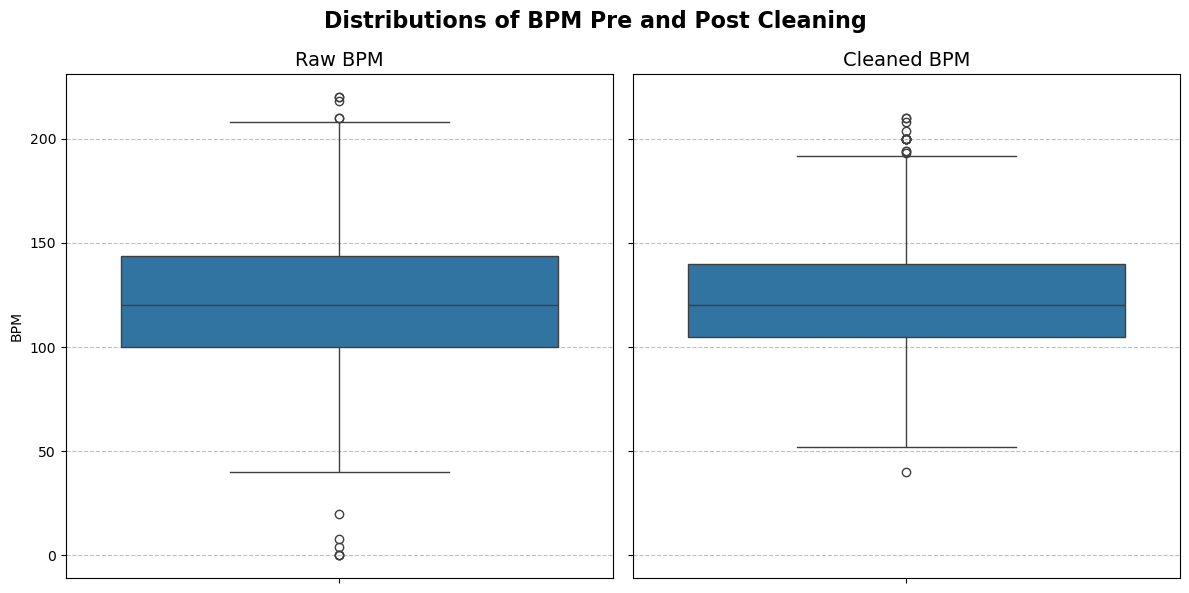

In [13]:
# BPM pre and post outlier removal

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6), sharey=True)

fig.suptitle('Distributions of BPM Pre and Post Cleaning', fontsize=16, fontweight='bold')
ax[0].set_title('Raw BPM', fontsize=14)
sns.boxplot(raw_df['BPM'], ax=ax[0])
ax[0].grid(axis='y', alpha=0.5, linestyle='--', color='gray')

ax[1].set_title('Cleaned BPM', fontsize=14)
sns.boxplot(df['BPM'], ax=ax[1])
ax[1].grid(axis='y', alpha=0.5, linestyle='--', color='grey')

plt.tight_layout()
plt.savefig(CLEANING_EVALUATIONS_DIR / 'box_bpm_pre_post_cleaning.png', dpi=300, bbox_inches='tight')
plt.show()

## Age

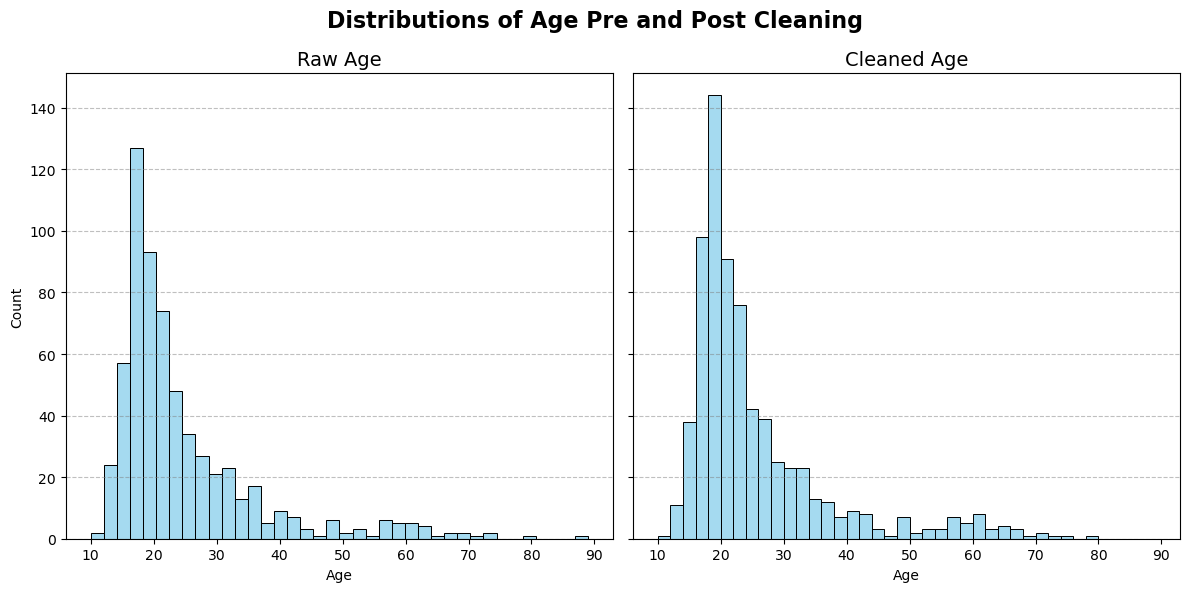

In [14]:
# Age pre and post outlier removal

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6), sharey=True, sharex=True)

fig.suptitle('Distributions of Age Pre and Post Cleaning', fontsize=16, fontweight='bold')
ax[0].set_title('Raw Age', fontsize=14)
sns.histplot(raw_df['Age'], ax=ax[0], color='skyblue')
ax[0].grid(axis='y', alpha=0.5, linestyle='--', color='gray')

ax[1].set_title('Cleaned Age', fontsize=14)
sns.histplot(df['Age'], ax=ax[1], color='skyblue')
ax[1].grid(axis='y', alpha=0.5, linestyle='--', color='grey')

plt.tight_layout()
plt.savefig(CLEANING_EVALUATIONS_DIR / 'bar_age_pre_post_cleaning.png', dpi=300, bbox_inches='tight')
plt.show()

It looks like some values were dropped. We will need to confirm that these were the result of **other cleaning steps**.

In [15]:
# Investigate dropped rows

# Left-join datasets on Age with indicator set to True to find ones dropped
merged_df = raw_df.merge(df, on=['Age'], how='left', indicator=True)

# Select rows only found in the raw dataset
merged_df[merged_df['_merge'] == 'left_only']

,Timestamp,Age,Primary streaming service_x,Hours per day_x,While working_x,Instrumentalist_x,Composer_x,Fav genre_x,Exploratory_x,Foreign languages_x,BPM_x,Frequency [Classical]_x,Frequency [Country]_x,Frequency [EDM]_x,Frequency [Folk]_x,Frequency [Gospel]_x,Frequency [Hip hop]_x,Frequency [Jazz]_x,Frequency [K pop]_x,Frequency [Latin]_x,Frequency [Lofi]_x,Frequency [Metal]_x,Frequency [Pop]_x,Frequency [R&B]_x,Frequency [Rap]_x,Frequency [Rock]_x,Frequency [Video game music]_x,Anxiety_x,Depression_x,Insomnia_x,OCD_x,Music effects_x,Permissions,Hours per day_y,BPM_y,Primary streaming service_y,While working_y,Instrumentalist_y,Composer_y,Fav genre_y,Exploratory_y,Foreign languages_y,Frequency [Classical]_y,Frequency [Country]_y,Frequency [EDM]_y,Frequency [Folk]_y,Frequency [Gospel]_y,Frequency [Hip hop]_y,Frequency [Jazz]_y,Frequency [K pop]_y,Frequency [Latin]_y,Frequency [Lofi]_y,Frequency [Metal]_y,Frequency [Pop]_y,Frequency [R&B]_y,Frequency [Rap]_y,Frequency [Rock]_y,Frequency [Video game music]_y,Anxiety_y,Depression_y,Insomnia_y,OCD_y,Music effects_y,_merge
13814,8/30/2022 18:15:39,73.0,Pandora,3.0,Yes,No,No,R&B,Yes,Yes,4.0,Sometimes,Very frequently,Rarely,Sometimes,Very frequently,Sometimes,Sometimes,Rarely,Very frequently,Never,Rarely,Sometimes,Very frequently,Sometimes,Sometimes,Never,5.0,4.0,0.0,1.0,Improve,I understand.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
17423,9/4/2022 13:07:45,68.0,Pandora,1.0,Yes,No,No,Gospel,No,No,8.0,Very frequently,Never,Never,Sometimes,Very frequently,Never,Never,Never,Sometimes,Never,Never,Never,Never,Never,Never,Never,10.0,10.0,10.0,0.0,Improve,I understand.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21726,9/28/2022 17:25:48,89.0,Spotify,24.0,Yes,Yes,Yes,Rap,No,No,143.0,Never,Never,Rarely,Rarely,Never,Very frequently,Sometimes,Never,Never,Rarely,Rarely,Rarely,Sometimes,Very frequently,Rarely,Never,0.0,0.0,0.0,0.0,No effect,I understand.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


### Summary

- The entries dropped contained **outlier** `BPM` entries.
- **No anomalies** are present in `Age` post-cleaning.

## Hours per Day

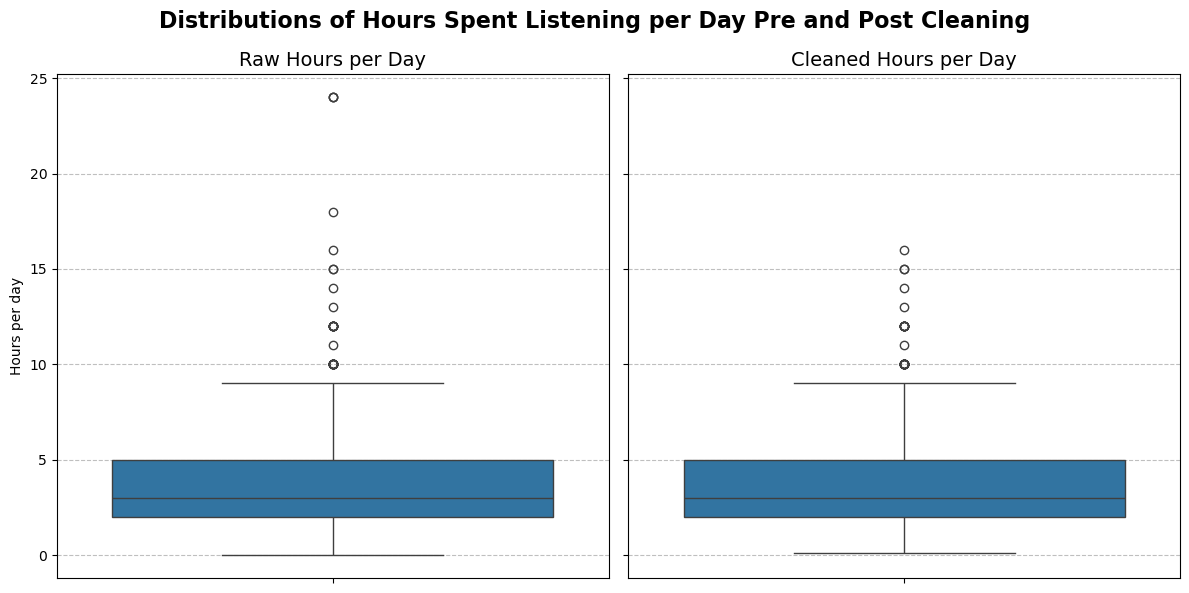

In [16]:
# Hours per day pre and post outlier removal

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6), sharey=True)

fig.suptitle('Distributions of Hours Spent Listening per Day Pre and Post Cleaning', fontsize=16, fontweight='bold')
ax[0].set_title('Raw Hours per Day', fontsize=14)
sns.boxplot(raw_df['Hours per day'], ax=ax[0])
ax[0].grid(axis='y', alpha=0.5, linestyle='--', color='gray')

ax[1].set_title('Cleaned Hours per Day', fontsize=14)
sns.boxplot(df['Hours per day'], ax=ax[1])
ax[1].grid(axis='y', alpha=0.5, linestyle='--', color='grey')

plt.tight_layout()
plt.savefig(CLEANING_EVALUATIONS_DIR / 'box_hours_pre_post_cleaning.png', dpi=300, bbox_inches='tight')
plt.show()

This aligns with the **max** and **min** numbers we set for a *reasonable* amount of time someone could spend listening to music.

# ✅ Impute Missing Values

##### Checklist:
- ✅ Distributions of `BPM` did not alter significantly.
- ✅ `Frequency` columns retained same distributions.
- ✅ Illness (`Anxiety`, `OCD`, `Insomnia`, `Depression`) proportions did not significantly change.

In [17]:
# Check for columns with missing values

print(f"Columns with missing values: {', '.join(df.columns[df.isna().sum() > 0])}")

Columns with missing values: 


In [18]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,24.939580,3.484685,123.226294,5.840559,4.806993,3.717483,2.613986
std,11.602233,2.618192,29.571452,2.769842,3.008709,3.059387,2.813896
min,10.000000,0.100000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,104.700000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,120.000000,6.000000,5.000000,3.000000,2.000000
75%,27.000000,5.000000,140.000000,8.000000,7.000000,6.000000,4.000000
max,80.000000,16.000000,210.000000,10.000000,10.000000,10.000000,10.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           715 non-null    float64
 1   Hours per day                 715 non-null    float64
 2   BPM                           715 non-null    float64
 3   Primary streaming service     715 non-null    object 
 4   While working                 715 non-null    object 
 5   Instrumentalist               715 non-null    object 
 6   Composer                      715 non-null    object 
 7   Fav genre                     715 non-null    object 
 8   Exploratory                   715 non-null    object 
 9   Foreign languages             715 non-null    object 
 10  Frequency [Classical]         715 non-null    object 
 11  Frequency [Country]           715 non-null    object 
 12  Frequency [EDM]               715 non-null    object 
 13  Frequ

## BPM

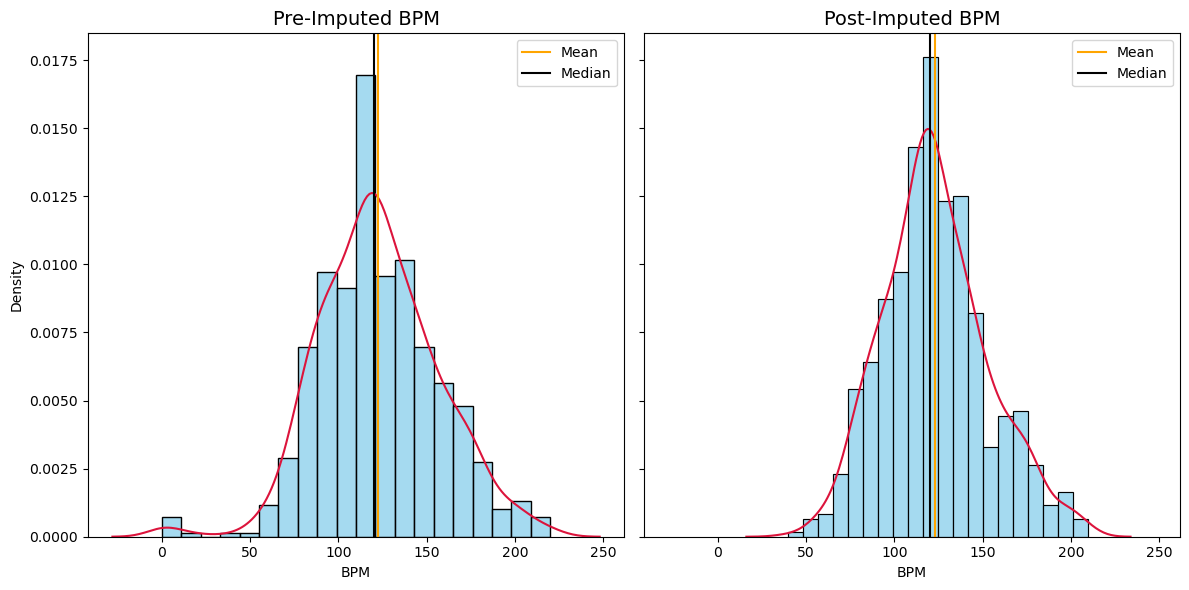

In [20]:
# Plot distributions of BPM pre and post imputation

raw_dfute_bpm_mean = np.mean(raw_df['BPM'])
raw_dfute_bpm_median = np.median(raw_df['BPM'])
post_impute_bpm_mean = np.mean(df['BPM'])
post_impute_bpm_median = np.median(df['BPM'])

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize=(12, 6))

ax[0].set_title('Pre-Imputed BPM', fontsize=14)
sns.histplot(raw_df['BPM'], stat='density', ax=ax[0], color='skyblue', bins=20)
sns.kdeplot(raw_df['BPM'], ax=ax[0], color='crimson')
ax[0].axvline(raw_dfute_bpm_mean, color='orange', label='Mean')
ax[0].axvline(raw_dfute_bpm_median, color='black', label='Median')
ax[0].legend()

ax[1].set_title('Post-Imputed BPM', fontsize=14)
sns.histplot(df['BPM'], stat='density', color='skyblue', bins=20)
sns.kdeplot(df['BPM'], color='crimson')
ax[1].axvline(post_impute_bpm_mean, color='orange', label='Mean')
ax[1].axvline(post_impute_bpm_median, color='black', label='Median')
ax[1].legend()

plt.tight_layout()
plt.savefig(CLEANING_EVALUATIONS_DIR / 'bar_bpm_pre_post_cleaning.png', dpi=300, bbox_inches='tight')
plt.show()

After removing outliers and imputing missing values, there is **no significant difference** between the two datasets.

## Frequency Columns

In [21]:
# Prepare pre and post impute data for plotting

melted_df = df.melt(value_vars=freq_cols, value_name='Frequency', var_name='Genre')
melted_raw_df = raw_df.melt(value_vars=freq_cols, value_name='Frequency', var_name='Genre')
melted_df['Genre'] = melted_df['Genre'].str.replace('Frequency ', '').str.slice(1, -1)
melted_raw_df['Genre'] = melted_raw_df['Genre'].str.replace('Frequency ', '').str.slice(1, -1)

# Combine into one df

melted_df['Source'] = 'Post-Imputation'
melted_raw_df['Source'] = 'Pre-Imputation'

combined_df = pd.concat([melted_df, melted_raw_df])

In [22]:
# Calculate proportions for accurate visualization

grouped_combined = combined_df.groupby(by=['Genre', 'Source']).value_counts(normalize=True).reset_index()

<Figure size 1200x600 with 0 Axes>

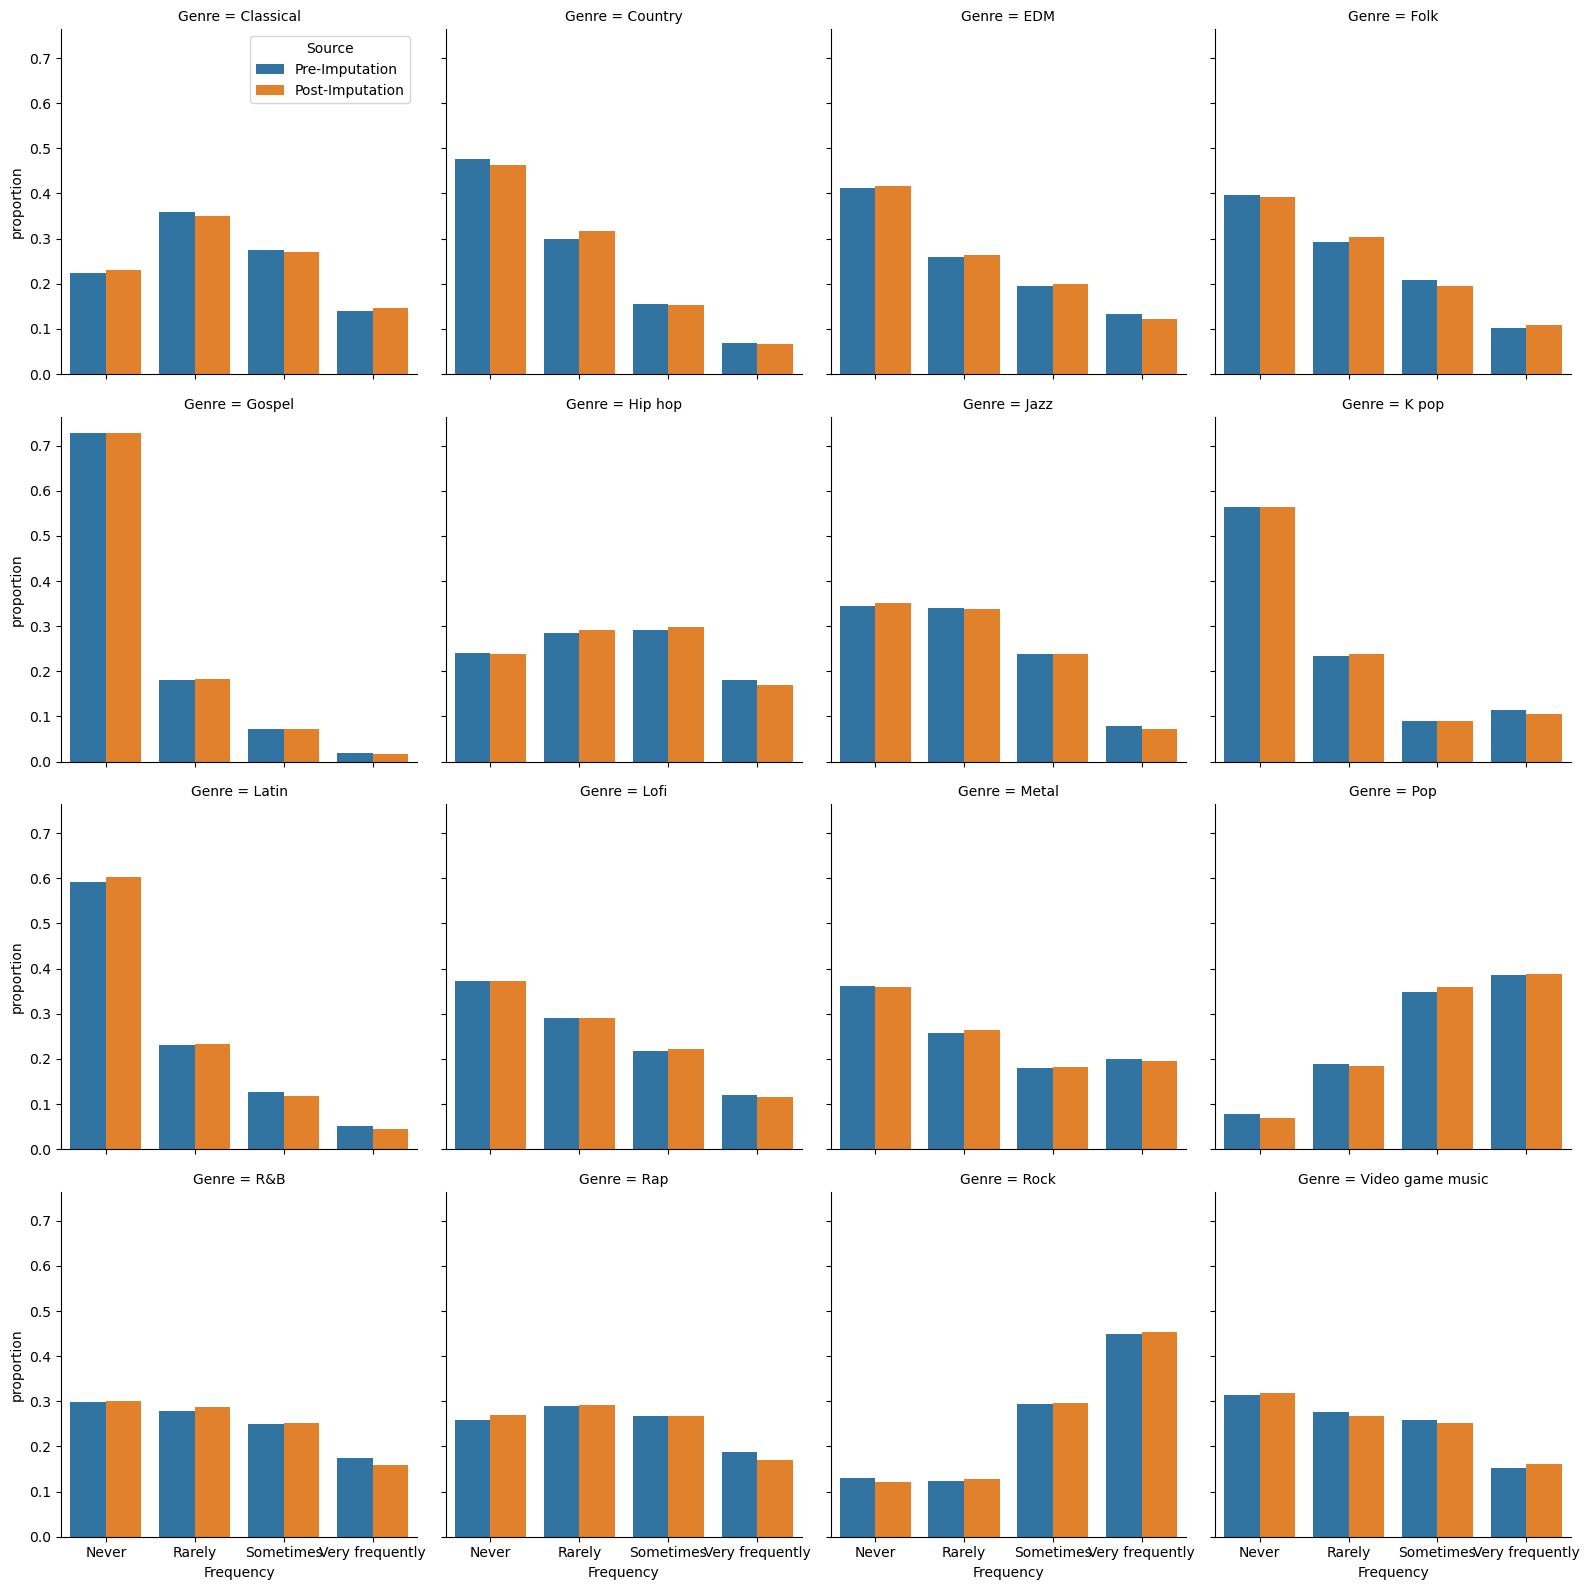

In [23]:
# Plot countplots from both datasets for comparison
plt.figure(figsize=(12, 6))

sns.catplot(
    data=grouped_combined,
    x='Frequency',
    y='proportion',
    kind='bar',
    col='Genre',
    col_wrap=4,
    hue='Source',
    order=['Never', 'Rarely', 'Sometimes', 'Very frequently'],
    hue_order=['Pre-Imputation', 'Post-Imputation'],
    height=4,
    dodge=True,
    legend_out=False
)

plt.tight_layout()
plt.savefig(CLEANING_EVALUATIONS_DIR / 'bar_frequency_pre_post.png', dpi=300, bbox_inches='tight')
plt.show()

There are **negligible** differences in `Frequency` columns before and after cleaning.

## Illness Columns

In [24]:
# Prepare pre and post impute data for plotting in long form

melted_df = df.melt(value_vars=ordinal_cols, var_name='Illness', value_name='Rank')
melted_df['Source'] = 'Post-Imputation'
melted_raw_df = raw_df.dropna().melt(value_vars=ordinal_cols, var_name='Illness', value_name='Rank')
melted_raw_df['Source'] = 'Pre-Imputation'

combined_df = pd.concat([melted_raw_df, melted_df])

# Since rank is ordinal not continuous convert to string

combined_df['Rank'] = combined_df['Rank'].astype(int).astype(str)

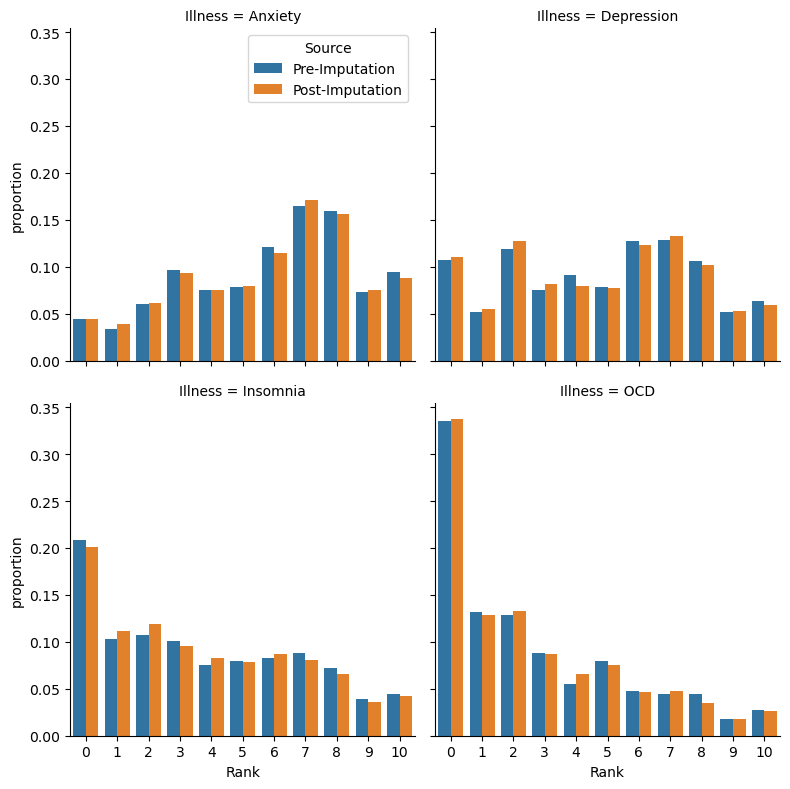

In [25]:
# Visualize percentages

grouped_combined = combined_df.groupby(by=['Illness', 'Source']).value_counts(normalize=True).reset_index()

sns.catplot(
    data=grouped_combined,
    x='Rank',
    y='proportion',
    col='Illness',
    col_wrap=2,
    kind='bar',
    hue='Source',
    hue_order=['Pre-Imputation', 'Post-Imputation'],
    order=list(range(11)),
    height=4,
    legend_out=False
)

plt.tight_layout()
plt.savefig(CLEANING_EVALUATIONS_DIR / 'bar_illness_pre_post_cleaning.png', dpi=300, bbox_inches='tight')
plt.show()

There are **no significant differences** between the two groups.